For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Instruction
Import the necessary libraries.
Load the customer_value_analysis.csv into the variable customer_df.
First look at its main features (head, shape, info).
Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
Change the type of effective_to_date column to DateTime format.
Check NaN values per column.
Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
Drop any ID column.
Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.
Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
According to the previous histogram plots, do you think that you will have to apply any transformation?
Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import numpy as np
pd.set_option('display.max_columns', 25)


In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns = customer_df.columns.str.lower()    #Changing the columns to lowercase
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [10]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [11]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
# Define the function
def get_numerical_and_categorical_columns(df):
    numerical_df = df.select_dtypes(include=['int64', 'float64'])
    categorical_df = df.select_dtypes(include=['object'])
    return numerical_df, categorical_df

In [13]:
get_numerical_and_categorical_columns(customer_df)

(      customer_lifetime_value  income  monthly_premium_auto  \
 0                 2763.519279   56274                    69   
 1                 6979.535903       0                    94   
 2                12887.431650   48767                   108   
 3                 7645.861827       0                   106   
 4                 2813.692575   43836                    73   
 ...                       ...     ...                   ...   
 9129             23405.987980   71941                    73   
 9130              3096.511217   21604                    79   
 9131              8163.890428       0                    85   
 9132              7524.442436   21941                    96   
 9133              2611.836866       0                    77   
 
       months_since_last_claim  months_since_policy_inception  \
 0                          32                              5   
 1                          13                             42   
 2                          18     

# Define the function
def get_numerical_and_categorical_columns(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_df = df[numerical_columns]
    categorical_df = df[categorical_columns]
    return numerical_df, categorical_df

# Call the function with your updated dataframe
numerical_df, categorical_df = get_numerical_and_categorical_columns(customer_df)

# Print the numerical columns dataframe
print("Numerical columns:")
print(numerical_df.head())

# Print the categorical columns dataframe
print("Categorical columns:")
print(categorical_df.head())


In [14]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
customer_df = customer_df.drop('customer', axis=1)

In [16]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [17]:
numerical = customer_df.select_dtypes(include=['int', 'float'])


In [18]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [19]:
corr_matrix = numerical.corr()


<AxesSubplot:>

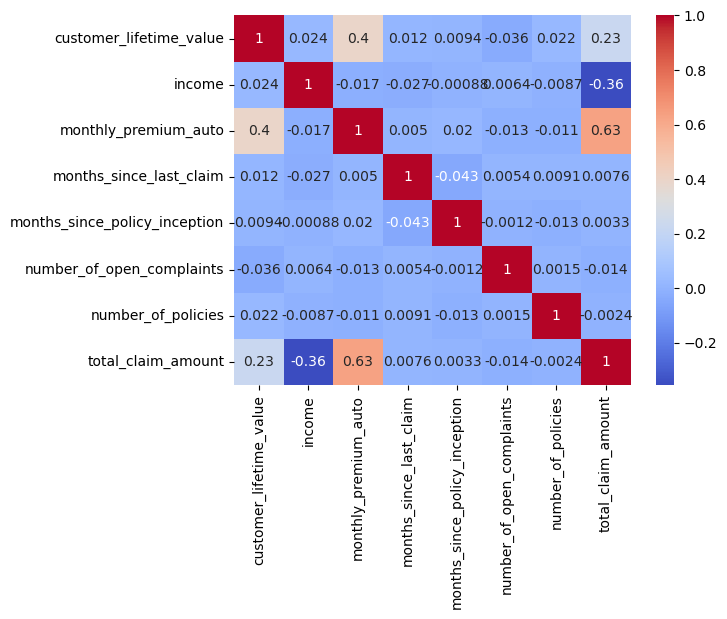

In [20]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


The pair of numerical variables that have the highest correlation are montly_premium_auto and income and it makes sense because the higher the income, the higher chances of monthly_premium_auto

In [21]:
def get_numerical_continuous_discrete(df, threshold=36):
    """
    Given a pandas DataFrame, returns two pandas DataFrames:
    the first containing numerical continuous columns and
    the second containing numerical discrete columns.
    The threshold argument sets the maximum number of unique
    values for a numerical column to be classified as discrete.
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    continuous_cols = []
    discrete_cols = []
    for col in numerical_cols:
        if df[col].nunique() > threshold:
            continuous_cols.append(col)
        else:
            discrete_cols.append(col)
    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]
    return continuous_df, discrete_df


In [22]:
continuous_df, discrete_df = get_numerical_continuous_discrete(customer_df)


In [23]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [24]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


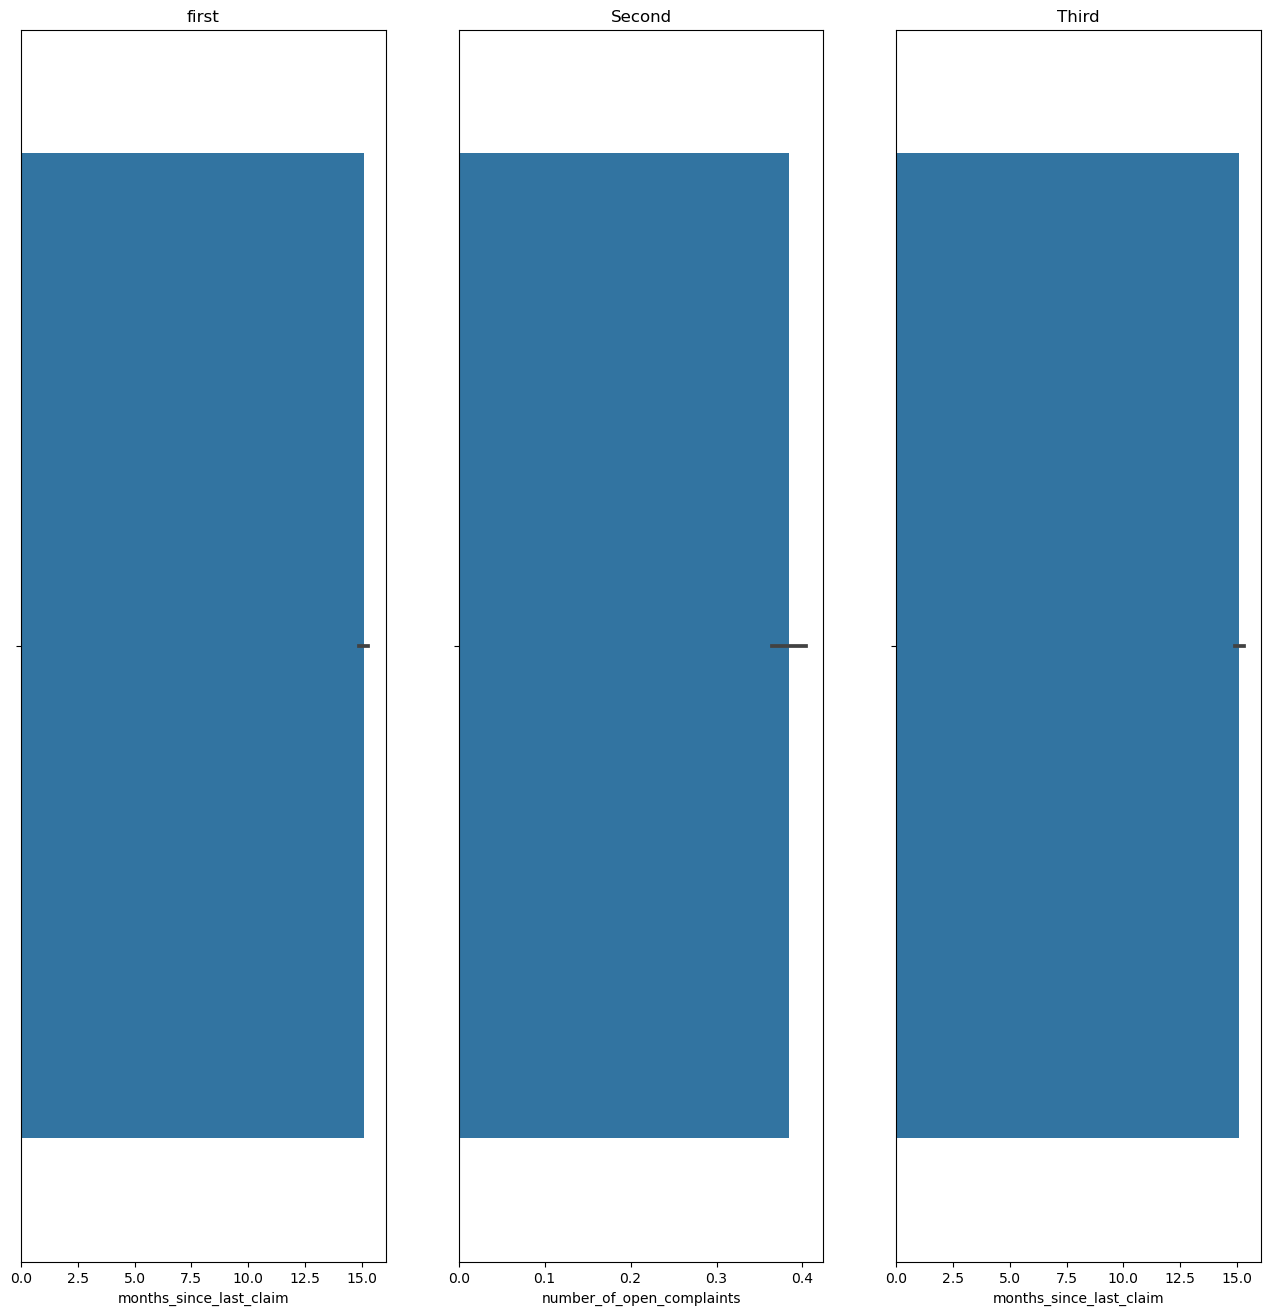

In [25]:
fig, ax = plt.subplots(1,3, figsize=(16,16))
sns.barplot(x="months_since_last_claim", data = discrete_df, ax = ax[0]);
ax[0].set_title("first")
#ax[0].set_ylim((0,25000))
sns.barplot(x="number_of_open_complaints", data = discrete_df, ax = ax[1]);
ax[1].set_title("Second")
#ax[1].set_ylim((0,25000))
sns.barplot(x="months_since_last_claim", data = discrete_df, ax = ax[2]);
ax[2].set_title("Third")
#ax[2].set_ylim((0,25000))
plt.show()




In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_discrete_barplots(dataframe):
    plt.figure(figsize=(16,16))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns)//3+1, 3, i+1)
        sns.barplot(dataframe[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def discrete_barplots(dataframe):
    plt.figure(figsize=(16,16))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns)//3+1, 3, i+1)
        sns.countplot(dataframe[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


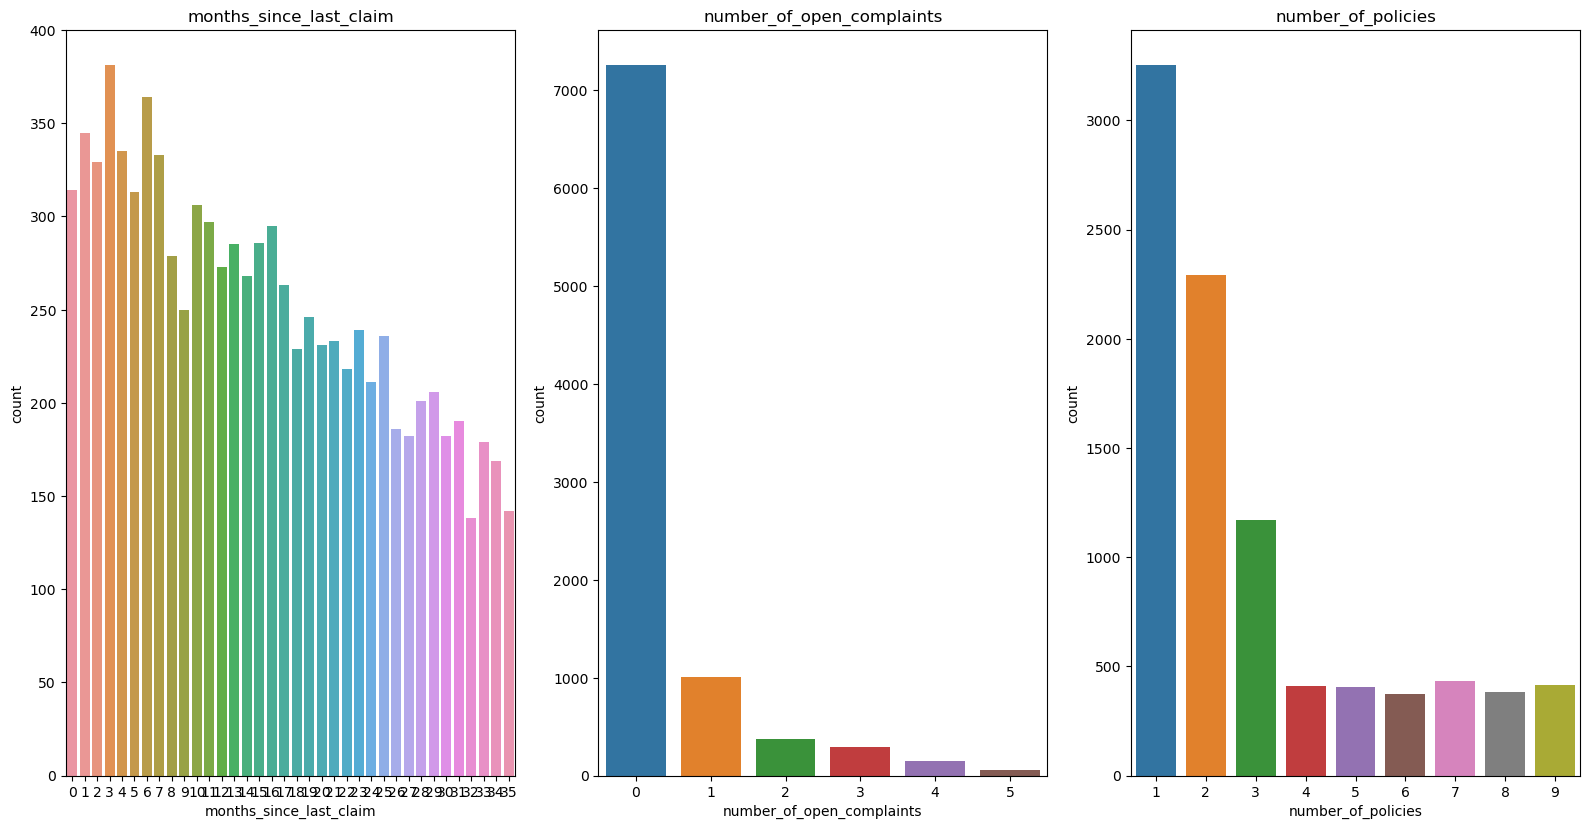

In [28]:
discrete_barplots(discrete_df)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


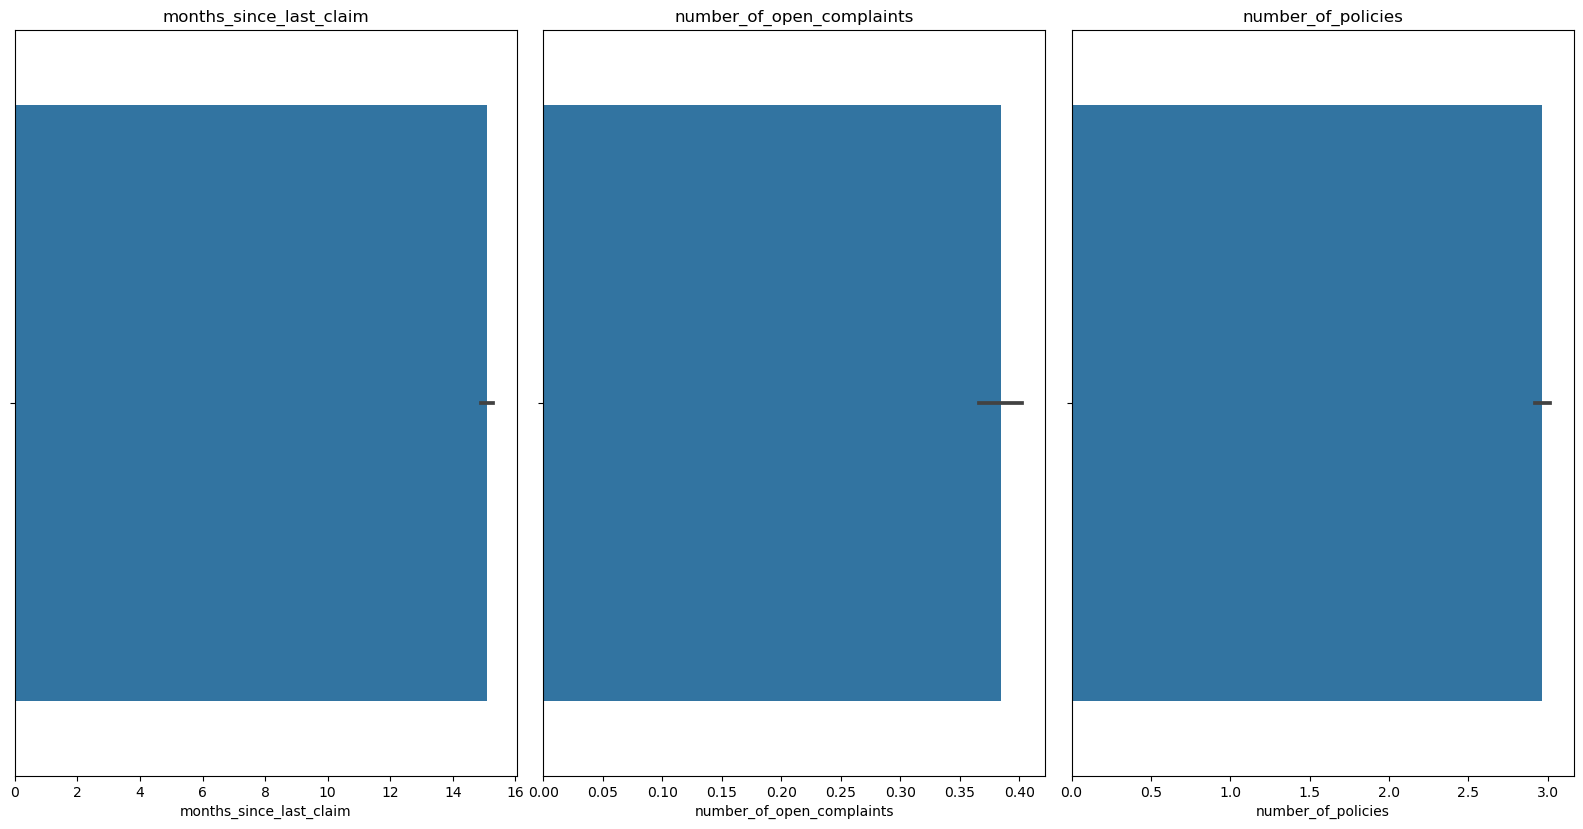

In [29]:
create_discrete_barplots(discrete_df)


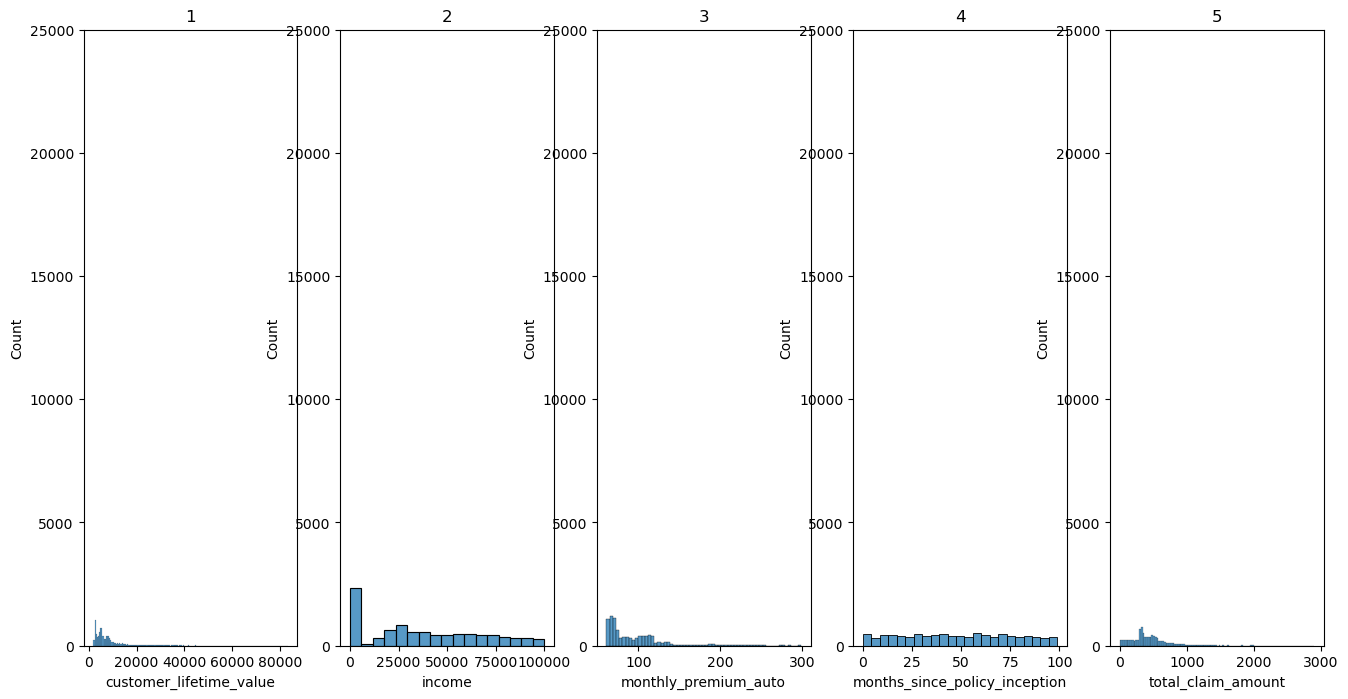

In [30]:

fig, ax = plt.subplots(1,5, figsize=(16,8))
sns.histplot(x="customer_lifetime_value", data = continuous_df, ax = ax[0]);
ax[0].set_title("1")
ax[0].set_ylim((0,25000))

sns.histplot(x="income", data = continuous_df, ax = ax[1]);
ax[1].set_title("2")
ax[1].set_ylim((0,25000))

sns.histplot(x="monthly_premium_auto", data = continuous_df, ax = ax[2]);
ax[2].set_title("3")
ax[2].set_ylim((0,25000))

sns.histplot(x="months_since_policy_inception", data = continuous_df, ax = ax[3]);
ax[3].set_title("4")
ax[3].set_ylim((0,25000))

sns.histplot(x="total_claim_amount", data = continuous_df, ax = ax[4]);
ax[4].set_title("5")
ax[4].set_ylim((0,25000))



plt.show()

In [31]:
import seaborn as sns

def plot_continuous_df_histograms(dataframe):
    plt.figure(figsize=(16,16))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(len(dataframe.columns)//3+1, 3, i+1)
        sns.histplot(dataframe[column], kde=False)
        plt.xlabel(column)
    plt.show()


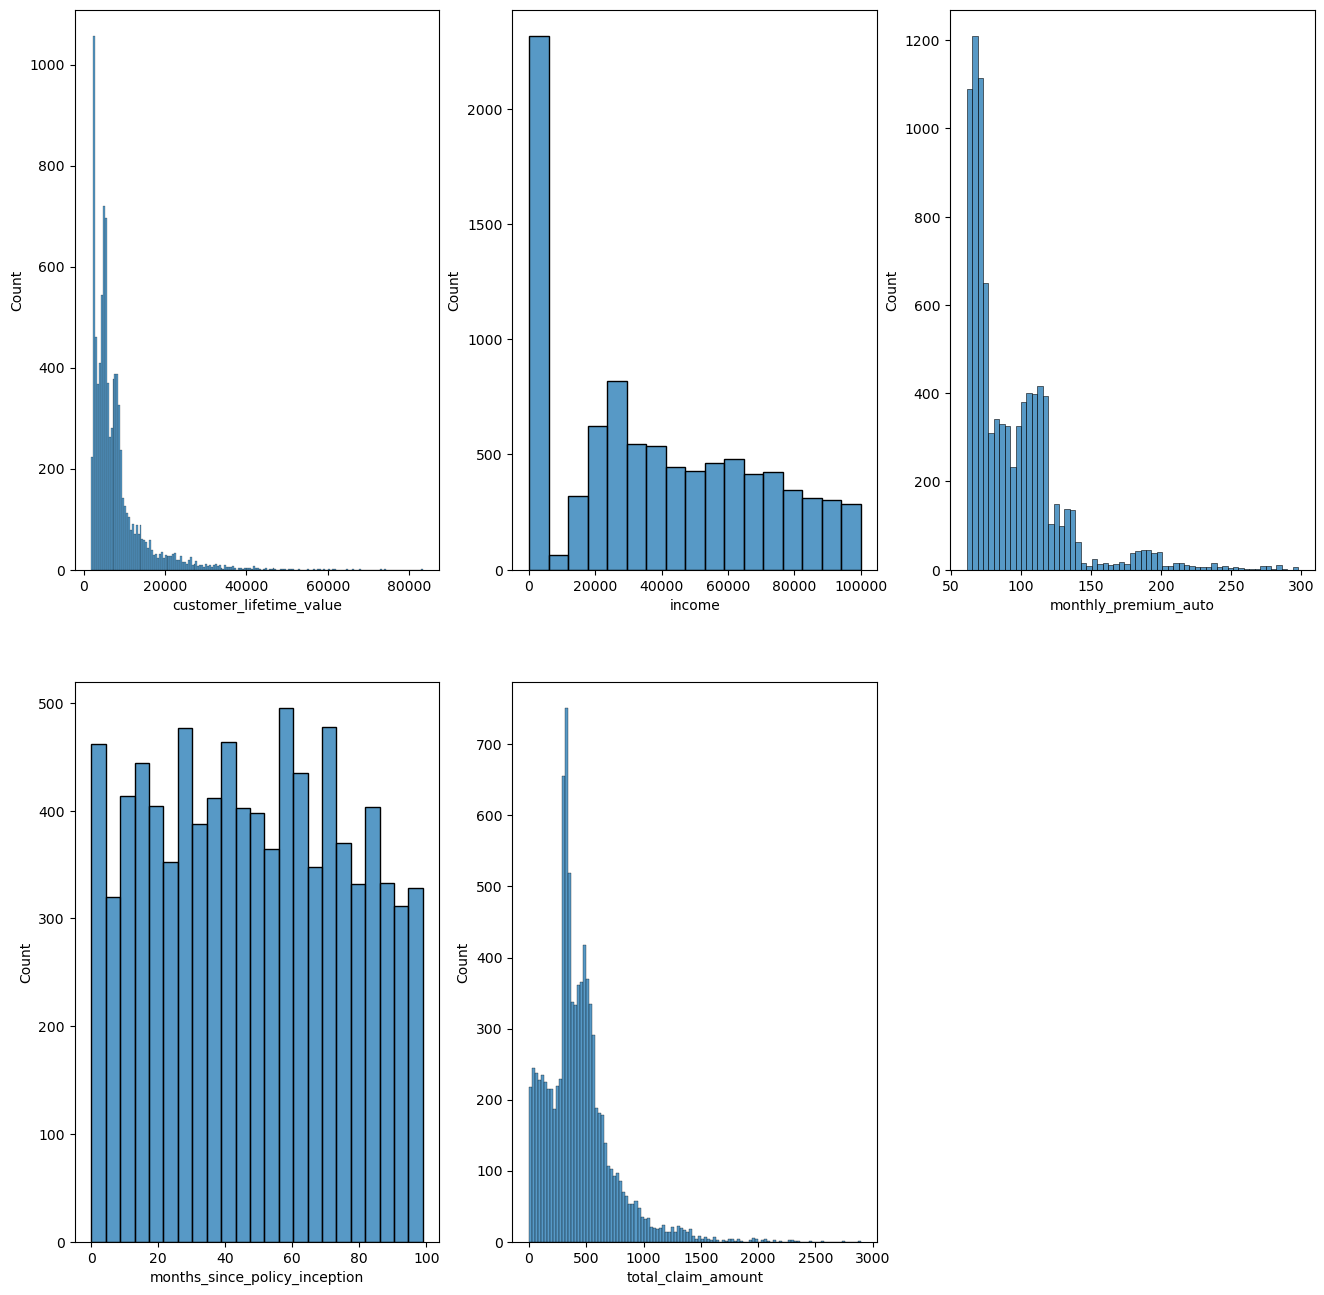

In [32]:
plot_continuous_df_histograms(continuous_df)

## I will be performing transformation on different columns such as number of open complains, number of policies and every column in the continous_df apart from months-since_policy_inception

In [33]:
import seaborn as sns

def plot_outliers(df):
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(16, 4*len(df.columns)))
    for i, col in enumerate(df.columns):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_xlabel(col)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

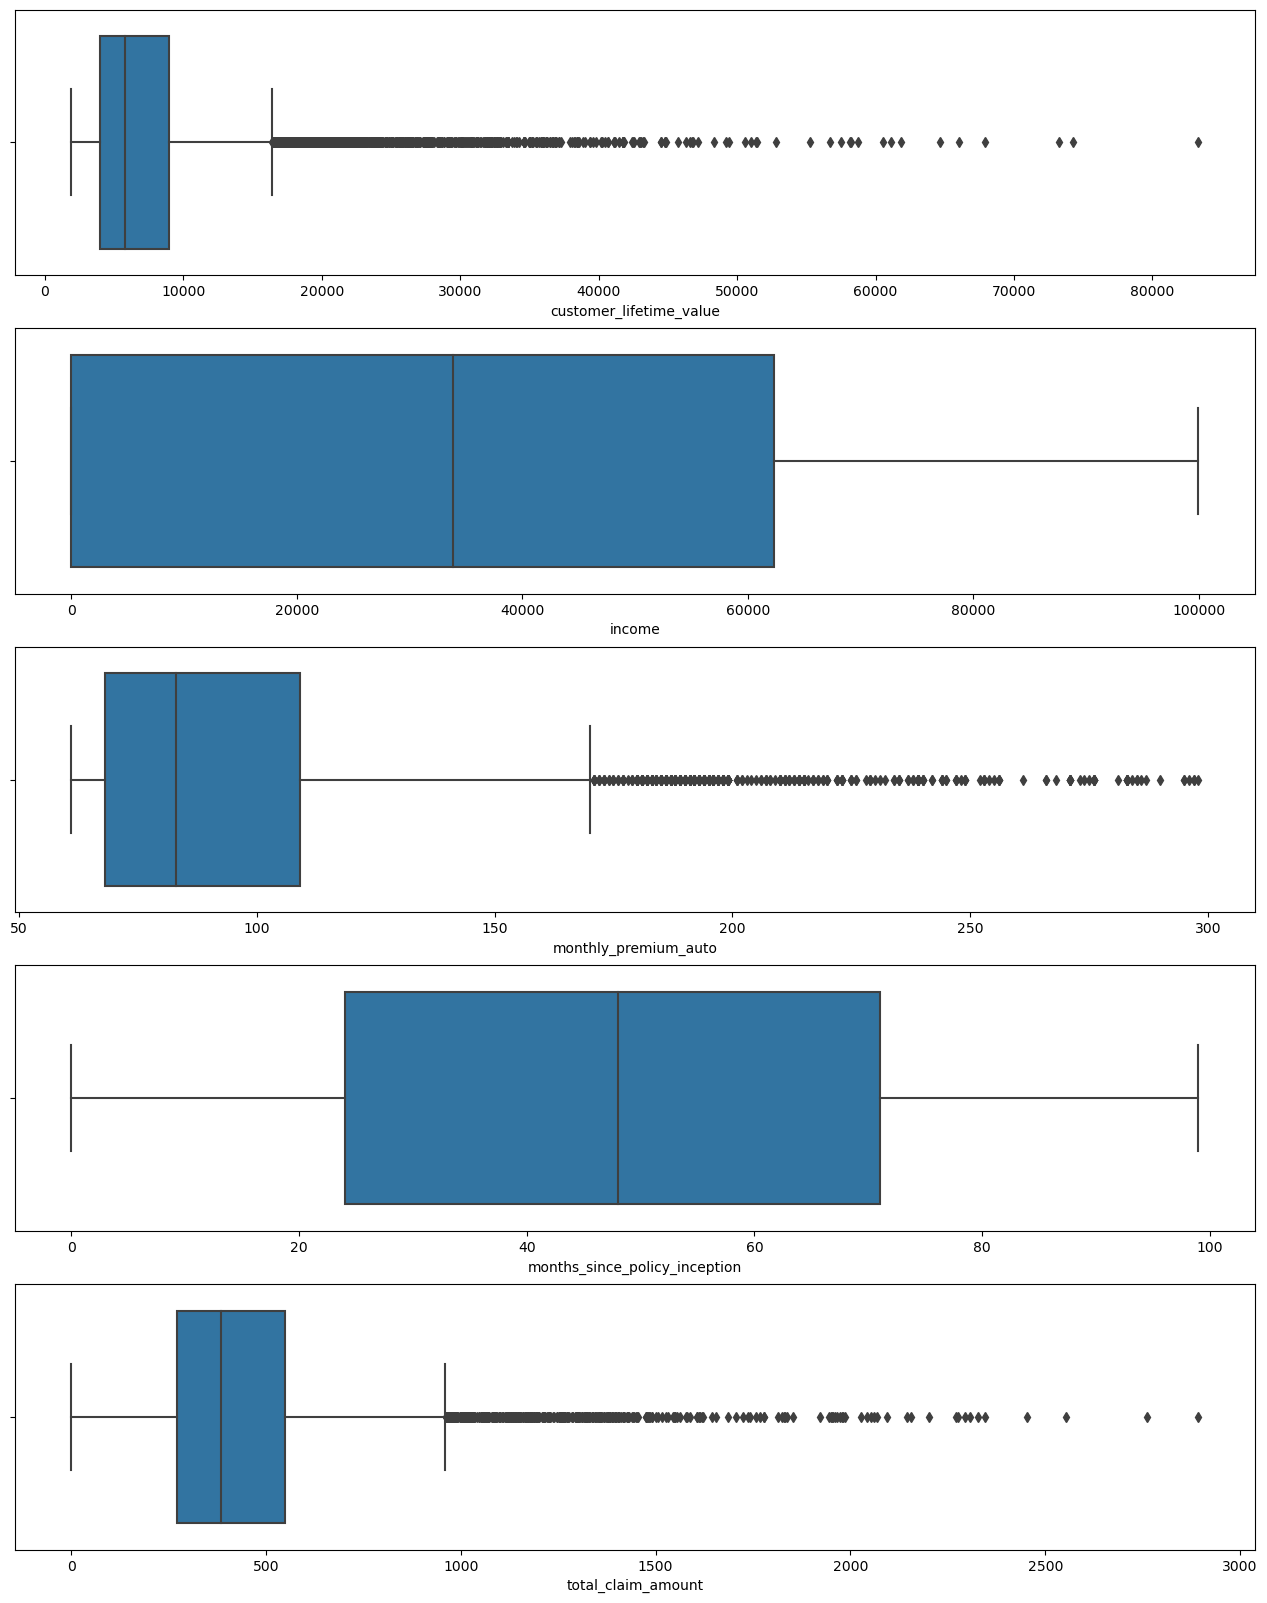

In [34]:
plot_outliers(continuous_df)

## SECOND ROUND

# Lab Cleaning Categorical Data

Lab | Cleaning categorical data
For this lab, we will be using the dataset in the Customer Analysis Business Case of the previous lab. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Special instructions
As in this lab, we will keep working on the same dataset as the previous lab, please make a copy of the final Jupyter notebook of the previous lab in the current lab folder. Next, use Markdown to add a new section in the Jupyter notebook named Lab Cleaning Categorical Data. Then restart the Kernel and run all the previous cells. Finally, keep working on the same notebook according to the next instructions.

## Instructions
Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.
policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.
Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)
To continue the analysis define an empty pandas DataFrame, and add the following new columns:
day with the day number of effective_to_date
day_name with the day NAME of effective_to_date
week with the week of effective_to_date
month with the month NAME of effective_to_date
total_claim_amount with total_claim_amount
Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)
Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
Plot the median "target" by day of the week name using a seaborn barplot
What can you conclude from this analysis?
Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
Can you do a monthly analysis given the output of the previous series? Why?
Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.
Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.
Turn the response column values into (Yes=1/No=0).
Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
Deal with column Gender turning the values into (1/0).
Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".
Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".
Encode the column location_code as: "Urban" > "Suburban" > "Rural".
Encode the column vehicle_size as: "Large" > "Medsize" > "Small".
Get a dataframe with the categorical nominal columns
Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [35]:
categorical = customer_df.select_dtypes(include=['object'])
categorical                                                 

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [36]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [37]:
def plot_categorical(df):
    categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            categorical_cols.append(col)
    value_counts = {}
    for col in categorical_cols:
        value_counts[col] = df[col].value_counts()
        value_counts[col] = value_counts[col].sort_values(ascending=False)
    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        if len(value_counts[col]) >= 6:
            sns.countplot(y=col, data=df, order=value_counts[col].index)
        else:
            sns.countplot(x=col, data=df, order=value_counts[col].index)
        plt.title(f'{col} Distribution')
        plt.show()


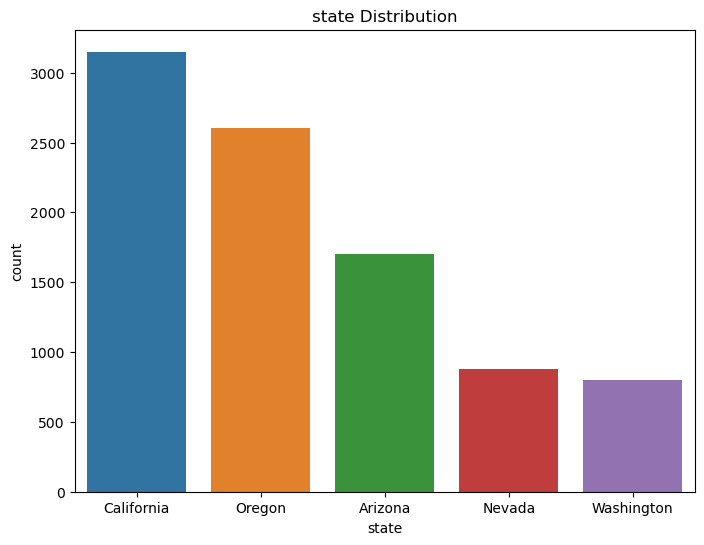

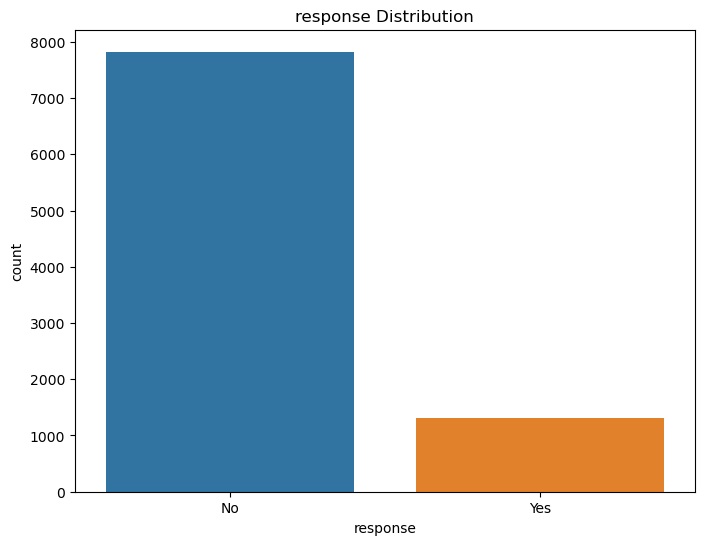

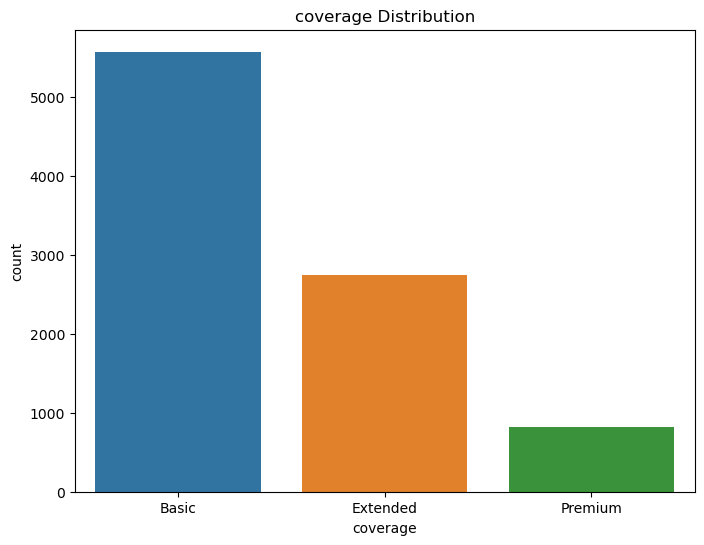

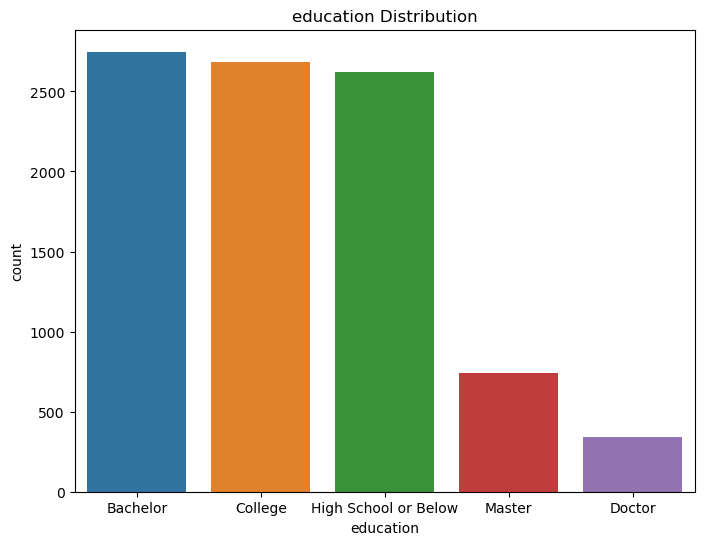

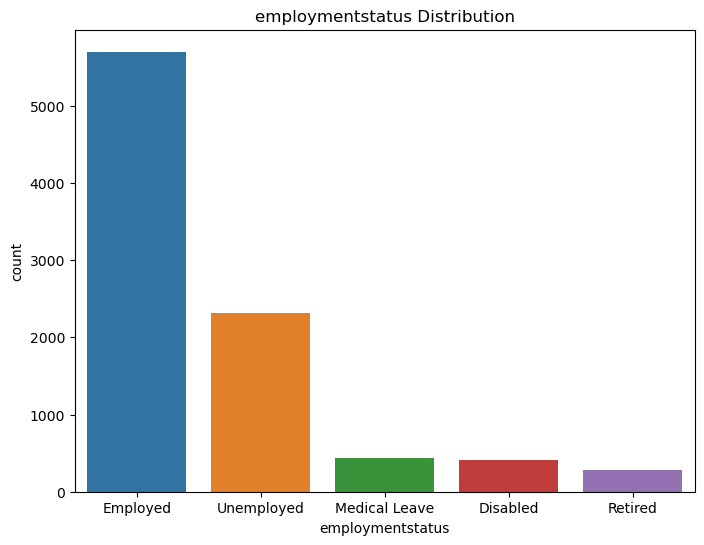

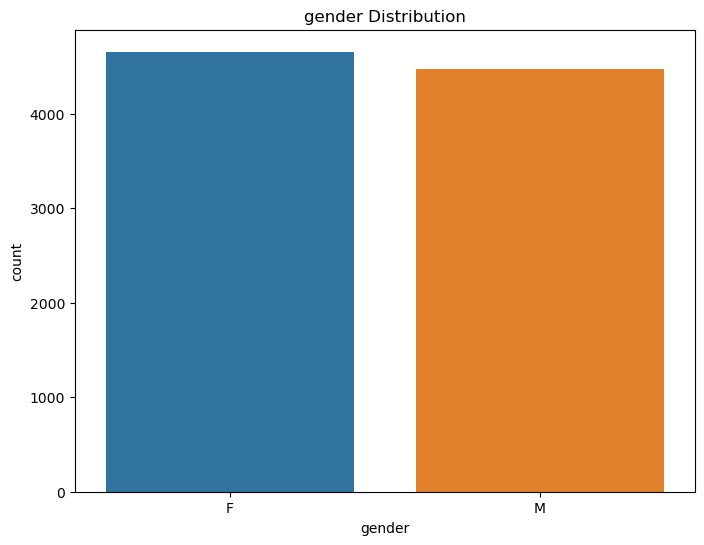

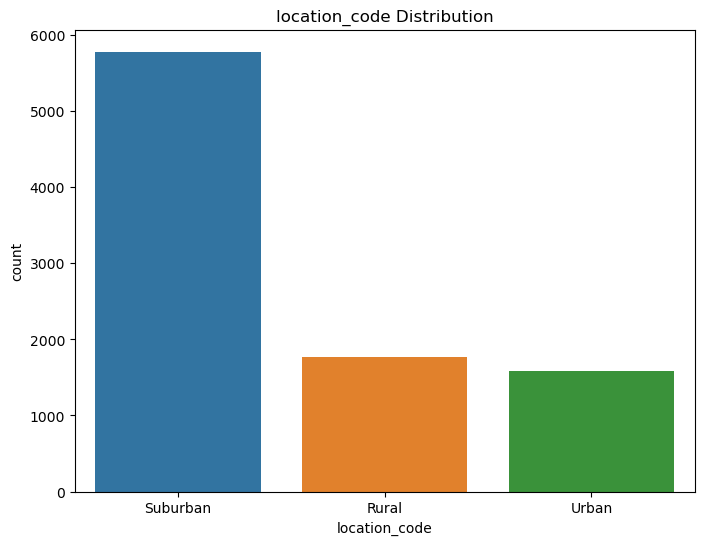

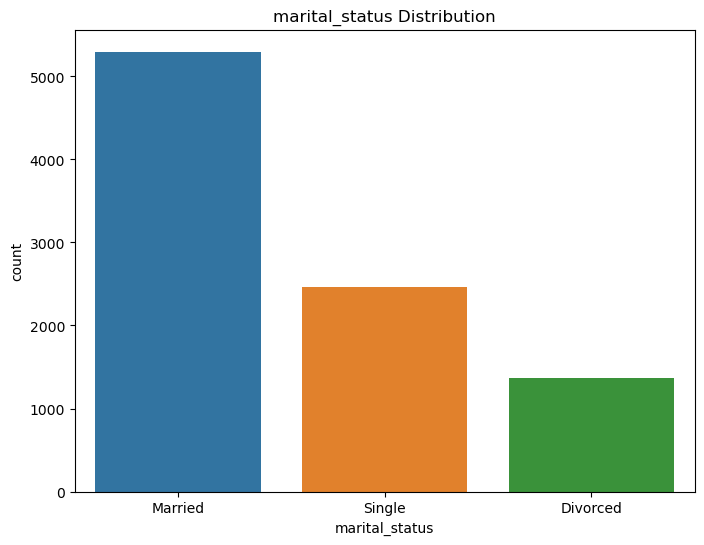

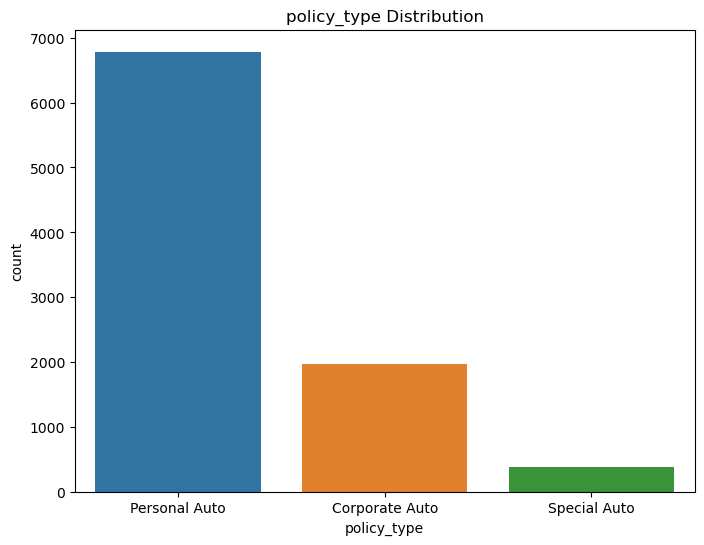

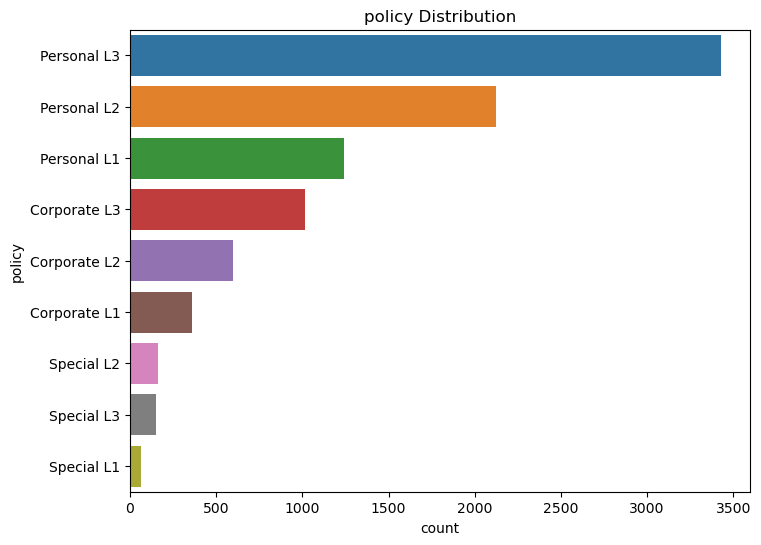

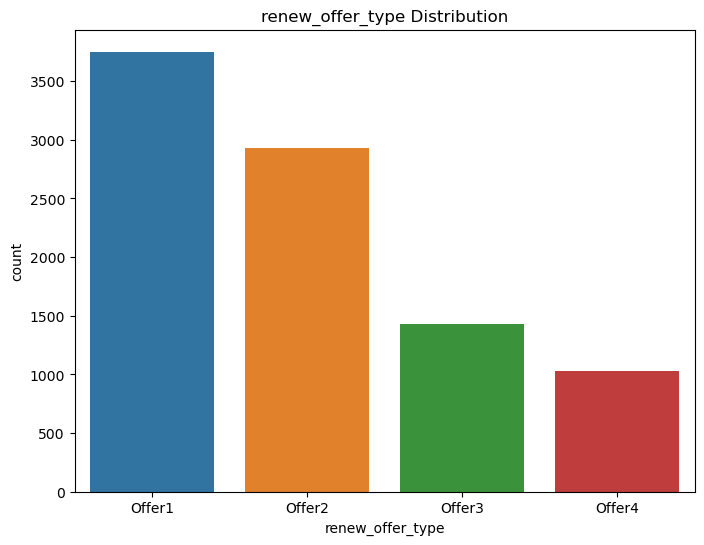

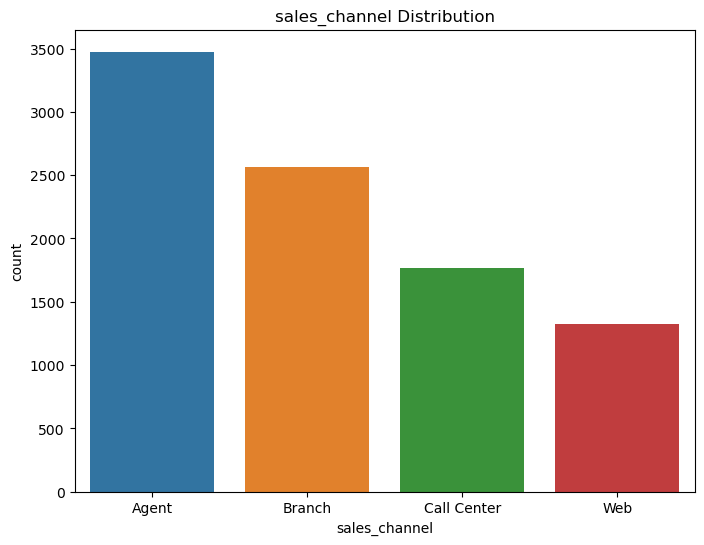

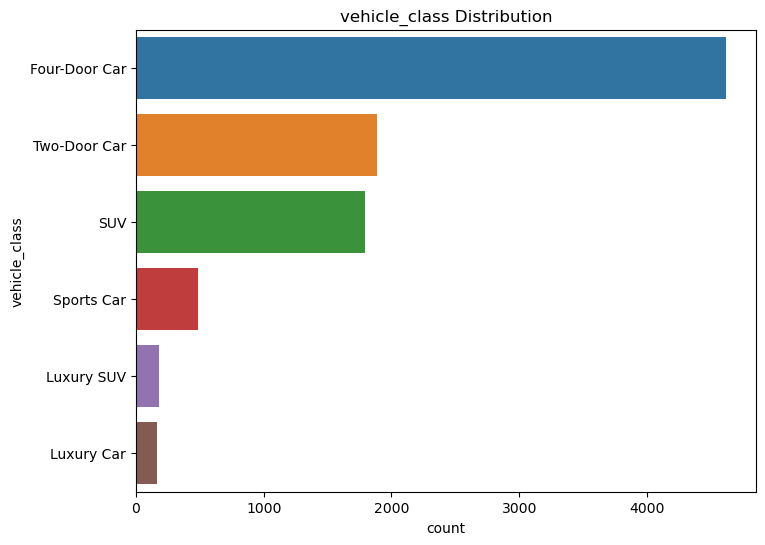

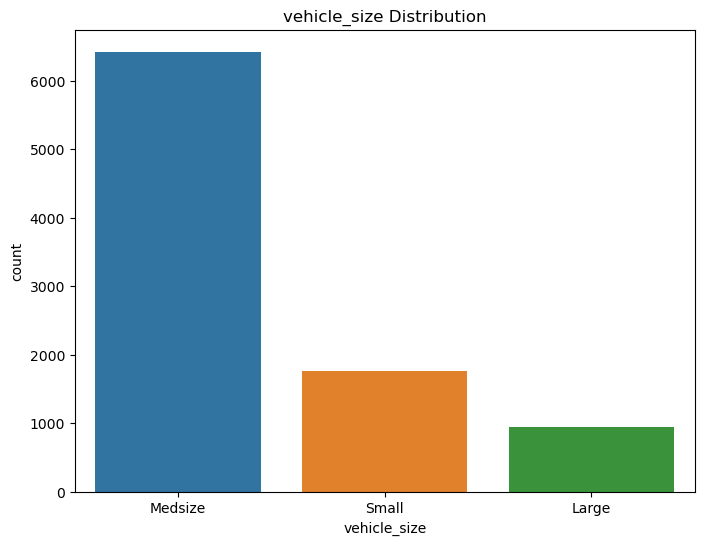

In [38]:
plot_categorical(categorical)


In [39]:
categorical = categorical.drop('policy_type', axis=1)


In [40]:
categorical['policy'].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [41]:
def clean_policy(df):
    df['policy'] = df['policy'].map({'Corporate L3': 'L3', 'Special L3': 'L3',
                                     'Personal L3' : 'L3', 
                                     'Corporate L2': 'L2', 'Personal L2': 'L2',
                                     'Special' : 'L2',
                                     'Corporate L1': 'L1', 'Personal L1': 'L1',
                                    'Special L1': 'L1'})
    return df


In [42]:
clean_policy(categorical)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large


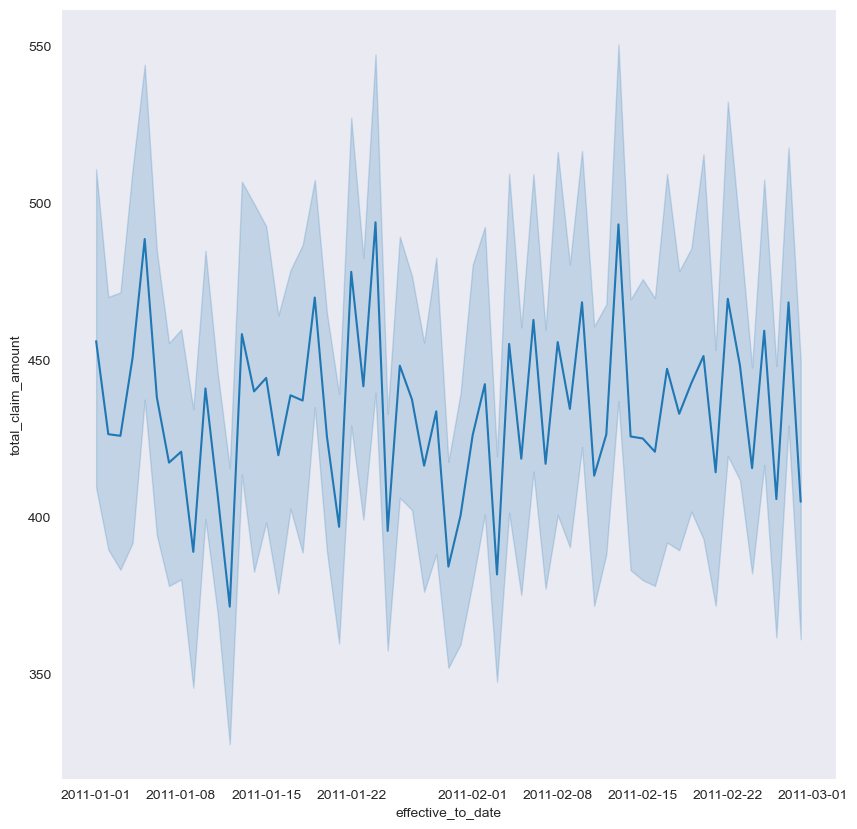

In [43]:
import seaborn as sns

sns.set_style('dark')

plt.figure(figsize=(10, 10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.show()


In [44]:
import pandas as pd
import datetime

# Create a new DataFrame with the required columns
date_df = pd.DataFrame(columns=['day', 'day_name', 'week', 'month', 'total_claim_amount'])

# Add the columns to the new DataFrame
date_df['day'] = customer_df['effective_to_date'].dt.day
date_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
date_df['week'] = customer_df['effective_to_date'].dt.week
date_df['month'] = customer_df['effective_to_date'].dt.month_name()
date_df['total_claim_amount'] = customer_df['total_claim_amount']


C:\Users\Admin\AppData\Local\Temp\ipykernel_11864\1639790201.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date_df['week'] = customer_df['effective_to_date'].dt.week


In [48]:
date_df.columns


Index(['day', 'day_name', 'week', 'month', 'total_claim_amount'], dtype='object')

In [49]:
target = date_df.groupby('day_name')['total_claim_amount'].sum().round(2)


In [51]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

target = target.reindex(index=list_of_correct_days)


In [52]:
target

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

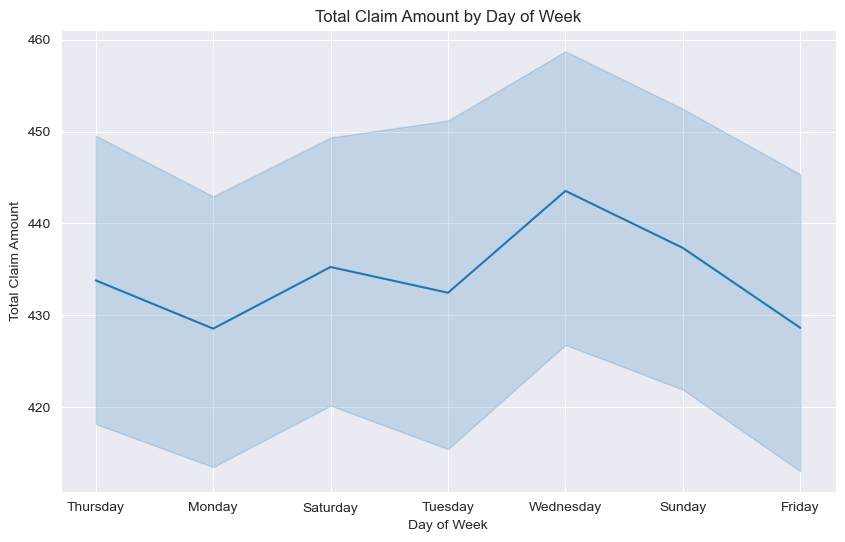

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=date_df, x="day_name", y="total_claim_amount")
plt.title("Total Claim Amount by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Claim Amount")
plt.show()


In [56]:
list_of_correct_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
claims_by_day = date_df.groupby('day_name')['total_claim_amount'].count().reindex(index=list_of_correct_values)


In [57]:
claims_by_day

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

In [58]:
median_by_day = date_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)


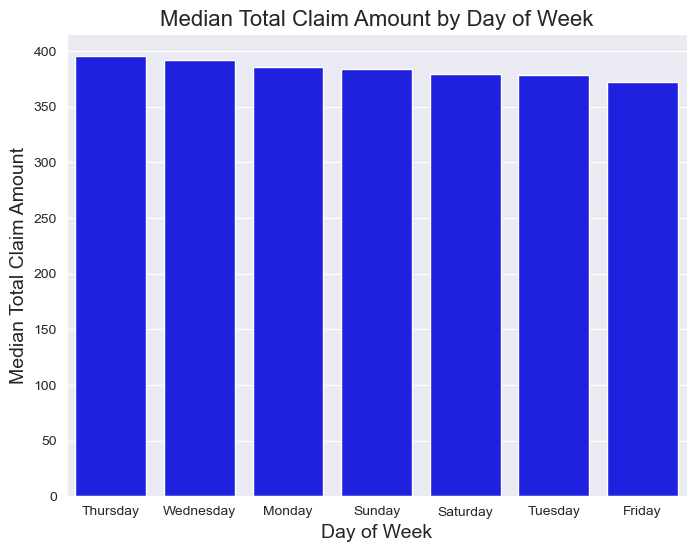

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the median target by day of the week name
median_target = date_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(8,6))
sns.barplot(x=median_target.index, y=median_target, color='blue')
plt.title('Median Total Claim Amount by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Median Total Claim Amount', fontsize=14)
plt.show()


# 10 the values are very similar.

In [60]:
target_by_month = date_df.groupby('month')['total_claim_amount'].sum().round(2)
target_by_month = target_by_month.reindex(index=list_of_correct_values)


In [62]:
month_df = customer_df[['effective_to_date', 'total_claim_amount']].copy()
month_df['month'] = pd.to_datetime(month_df['effective_to_date']).dt.strftime('%B')
month_df = month_df[['month', 'total_claim_amount']]
month_median = month_df.groupby('month')['total_claim_amount'].agg('median').round(2)


In [63]:
correct_month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_median = month_median.reindex(index=correct_month_order)


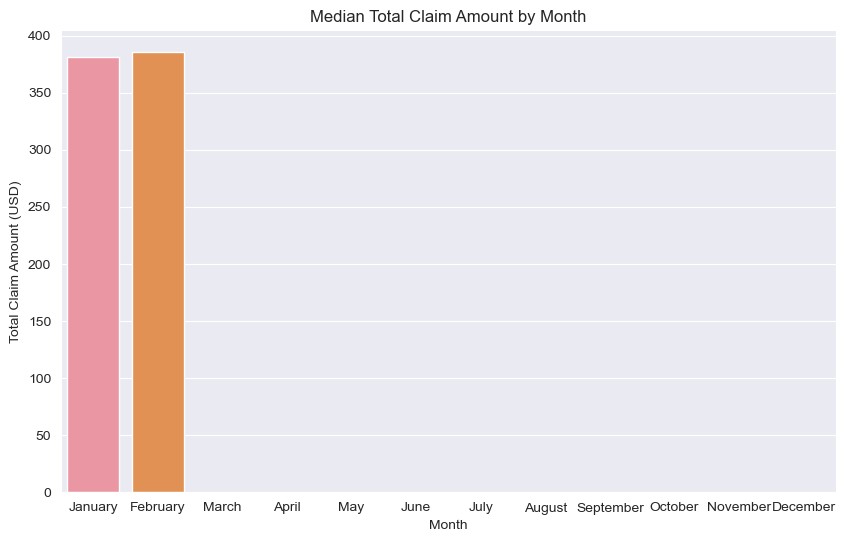

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x=month_median.index, y=month_median.values)
plt.title("Median Total Claim Amount by Month")
plt.xlabel("Month")
plt.ylabel("Total Claim Amount (USD)")
plt.show()


In [67]:
import pandas as pd
import numpy as np

def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df



In [68]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [69]:
import pandas as pd
import numpy as np

def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df

# Example usage
continuous_clean_df = remove_outliers(continuous_df)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11864\2656448162.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[outliers_mask, col] = np.nan


In [70]:
continuous_clean_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,384.811147
1,6979.535903,0.0,94.0,42.0,1131.464935
2,12887.431650,48767.0,108.0,38.0,566.472247
3,7645.861827,0.0,106.0,65.0,529.881344
4,2813.692575,43836.0,73.0,44.0,138.130879
...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,198.234764
8666,3096.511217,21604.0,79.0,28.0,379.200000
8667,8163.890428,0.0,85.0,37.0,790.784983
8668,7524.442436,21941.0,96.0,3.0,691.200000


In [73]:
# concatenate the dataframes
df = pd.concat([continuous_clean_df, discrete_df, categorical, date_df['week']], axis=1)

# drop the NaN values and reset the index
df = df.dropna().reset_index(drop=True)


In [74]:
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,8
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,5
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,7
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,3
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,23405.987980,71941.0,73.0,89.0,198.234764,21,1,6,California,No,Basic,College,Medical Leave,M,Suburban,Married,L2,Offer1,Web,Four-Door Car,Medsize,2
8502,3096.511217,21604.0,79.0,28.0,379.200000,25,0,1,California,No,Basic,Master,Medical Leave,F,Rural,Married,L2,Offer2,Branch,Four-Door Car,Medsize,4
8503,8163.890428,0.0,85.0,37.0,790.784983,23,0,1,California,No,Extended,High School or Below,Unemployed,M,Suburban,Single,L3,Offer2,Call Center,Two-Door Car,Small,6
8504,7524.442436,21941.0,96.0,3.0,691.200000,11,0,6,California,No,Basic,High School or Below,Unemployed,M,Suburban,Single,L2,Offer3,Agent,Four-Door Car,Medsize,1


In [75]:
df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'week'],
      dtype='object')

In [76]:
df = df.reindex(columns=['customer_lifetime_value', 'income', 'monthly_premium_auto',
                         'months_since_policy_inception', 'months_since_last_claim', 
                         'number_of_open_complaints', 'number_of_policies', 'state',
                         'response', 'coverage', 'education', 'employmentstatus', 'gender',
                         'location_code', 'marital_status', 'policy', 'renew_offer_type',
                         'sales_channel', 'vehicle_class', 'vehicle_size', 'week', 
                         'total_claim_amount'])


In [77]:
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,8,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize,5,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize,7,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,5,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,23405.987980,71941.0,73.0,89.0,21,1,6,California,No,Basic,College,Medical Leave,M,Suburban,Married,L2,Offer1,Web,Four-Door Car,Medsize,2,198.234764
8502,3096.511217,21604.0,79.0,28.0,25,0,1,California,No,Basic,Master,Medical Leave,F,Rural,Married,L2,Offer2,Branch,Four-Door Car,Medsize,4,379.200000
8503,8163.890428,0.0,85.0,37.0,23,0,1,California,No,Extended,High School or Below,Unemployed,M,Suburban,Single,L3,Offer2,Call Center,Two-Door Car,Small,6,790.784983
8504,7524.442436,21941.0,96.0,3.0,11,0,6,California,No,Basic,High School or Below,Unemployed,M,Suburban,Single,L2,Offer3,Agent,Four-Door Car,Medsize,1,691.200000


In [78]:
df['response'] = df['response'].replace({'Yes': 1, 'No': 0})


In [79]:
# create a dictionary to map values to new categories
education_dict = {"Master": "Graduate", "Doctor": "Graduate"}

# replace the values using the dictionary
df["education"] = df["education"].replace(education_dict)


In [80]:
df['employmentstatus'].replace(["Medical Leave", "Disabled", "Retired"], "Inactive", inplace=True)


In [81]:
print(df['gender'].unique())

['F' 'M']


In [83]:
gender_map = {"F": 0, "M": 1}
df["gender"] = df["gender"].map(gender_map)


In [84]:
# Create a dictionary to map the values
vehicle_class_mapping = {"Sports Car": "Luxury", "Luxury SUV": "Luxury", "Luxury Car": "Luxury"}

# Use the map() function to apply the dictionary to the column
df["vehicle_class"] = df["vehicle_class"].map(vehicle_class_mapping).fillna(df["vehicle_class"])


In [85]:
coverage_map = {
    'Basic': 1,
    'Extended': 2,
    'Premium': 3
}

df['coverage'] = df['coverage'].replace(coverage_map)


In [86]:
# define the encoding scheme
employmentstatus_map = {'Employed': 2, 'Inactive': 1, 'Unemployed': 0}

# apply the encoding using the map method
df['employmentstatus'] = df['employmentstatus'].map(employmentstatus_map)


In [87]:
location_mapping = {'Urban': 2, 'Suburban': 1, 'Rural': 0}
df['location_code'] = df['location_code'].map(location_mapping)


In [88]:
vehicle_size_map = {"Large": 2, "Medsize": 1, "Small": 0}
df["vehicle_size"] = df["vehicle_size"].map(vehicle_size_map)


In [89]:

# Identify the categorical nominal columns
categorical_nominal_cols = []
for col in df.columns:
    if df[col].dtype == object and df[col].nunique() < 10:
        categorical_nominal_cols.append(col)

# Create a new dataframe with the categorical nominal columns
categorical_nominal_df = df[categorical_nominal_cols]


In [90]:
categorical_nominal_df

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
1,Arizona,Bachelor,Single,L3,Offer3,Agent,Four-Door Car
2,Nevada,Bachelor,Married,L3,Offer1,Agent,Two-Door Car
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...
8501,California,College,Married,L2,Offer1,Web,Four-Door Car
8502,California,Graduate,Married,L2,Offer2,Branch,Four-Door Car
8503,California,High School or Below,Single,L3,Offer2,Call Center,Two-Door Car
8504,California,High School or Below,Single,L2,Offer3,Agent,Four-Door Car


In [91]:
# create a list of the categorical nominal columns
categorical_nominal_cols = ['state', 'response', 'education', 'employmentstatus', 'gender', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

# create a list of named levels
levels = []

# loop through each categorical nominal column and get its unique values
for col in categorical_nominal_cols:
    unique_vals = df[col].unique()
    levels.append(list(unique_vals))

print(levels)


[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [0, 1], ['Bachelor', 'College', 'Graduate', 'High School or Below'], [2, 0, 1], [0, 1], ['Married', 'Single', 'Divorced'], ['L3', 'L2', 'L1'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Branch'], ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]


In [92]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(drop='first', categories=levels)


In [93]:
encoder

OneHotEncoder(categories=[['Washington', 'Arizona', 'Nevada', 'California',
                           'Oregon'],
                          [0, 1],
                          ['Bachelor', 'College', 'Graduate',
                           'High School or Below'],
                          [2, 0, 1], [0, 1], ['Married', 'Single', 'Divorced'],
                          ['L3', 'L2', 'L1'],
                          ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
                          ['Agent', 'Call Center', 'Web', 'Branch'],
                          ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']],
              drop='first')